# Analysis of PolyaClassifier site definition for *S. cerevisiae*

**Purpose**: To identify 4mer motifs important to cleavage site definition in *S. cerevisiae* through a systematic mutation approach.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%run -i notebook_setup.py

## IMPORTS AND SETUP

In [4]:
from paper_utilities import motifs

In [5]:
species   = 'saccharomyces_cerevisiae'
modeltype = 'polyaclassifier'
config    = 'polyaclassifier_bagging3_kmers-4'
kmer      = 4


In [6]:
PROJECT   = "/projects/b1080/eks/polyadenylation/yeast"
OUTDIR    = os.path.join(PROJECT, 'manuscript', 'analysis', 'polyaclassifier_motif_importance_scer_4mers')
RESOURCES = os.path.join(os.path.dirname(OUTDIR), 'resources')
os.makedirs(OUTDIR, exist_ok = True)


In [7]:
## Load model configuration information

with open(os.path.join(RESOURCES, 'polyaclassifier_configurations.pickle'), mode = 'rb') as handle:
    configurations = pickle.load(handle)

gold_sites = configurations[species][config]['golden_lines']
print("\nNumber of golden sites:", gold_sites)

mot_dis_dir = os.path.join(PROJECT, species, 'analysis', 'motif_analysis', 'motif_disruption', config)
print("\nDirectory containing motif disruption results:", mot_dis_dir)



Number of golden sites: 11673

Directory containing motif disruption results: /projects/b1080/eks/polyadenylation/yeast/saccharomyces_cerevisiae/analysis/motif_analysis/motif_disruption/polyaclassifier_bagging3_kmers-4


In [8]:
## Load motif family definitions for S. cerevisiae

scer_definitions = {'patterns' : {}, 'distance' : {}}

# By pattern - we only look at pattern families for 6mers
with open(os.path.join(RESOURCES, f'motif_definitions.scer.6mers.patterns.pickle'), mode = 'rb') as handle:
    scer_definitions['patterns'][6] = pickle.load(handle)
    
scer_definitions['patterns'][5] = {'family':{}}
scer_definitions['patterns'][4] = {'family':{}}

# By Hamming distance
for kmer in [4,5,6]:
    with open(os.path.join(RESOURCES, f'motif_definitions.scer.{kmer}mers.distance.pickle'), mode = 'rb') as handle:
        scer_definitions['distance'][kmer] = pickle.load(handle)


In [9]:
with open(os.path.join(RESOURCES, 'polyaclassifier_motifs.significant_motifs.pickle'), mode = 'rb') as handle:
    significant_motifs = pickle.load(handle)

sigmots = significant_motifs[species][modeltype][config]
print(f"Significant motifs = {len(sigmots)}")


Significant motifs = 15


# ANALYSIS

In [10]:
family_cmap = {
    'A-rich'        : '#2278B5',
    'A-rich_d0'     : '#2278B5',
    'A-rich_d1'     : '#6AB1E3',
    'A-rich_d2'     : '#9CCBEC',
    'T-rich'        : '#2FA148',
    'T-rich_d0'     : '#2FA148',
    'T-rich_d1'     : '#73D689',
    'T-rich_d2'     : '#A1E4B0',
    'TA/TA-rich'    : '#D62A28',
    'TA/TA-rich_d0' : '#D62A28',
    'TA/TA-rich_d1' : '#E77F7E',
    'TA/TA-rich_d2' : '#EFAAA9',
    'G/A-rich'      : '#956CB4',
    'G/A-rich_d0'   : '#956CB4',
    'Other'         : '#F7F8F8',
    'Pattern'       : '#000000',
}


## Top individual motifs in each region

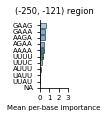

   motif  frequency     score   conf_lo   conf_hi         family  error_lo
7   GAAG       7535  0.642087  0.653252  0.630922      A-rich_d2  0.011165
6   GAAA       8777  0.524131  0.532435  0.515826      A-rich_d1  0.008305
1   AAGA       9013  0.510401  0.518990  0.501812      A-rich_d1  0.008589
2   AGAA       8642  0.437293  0.445429  0.429157      A-rich_d1  0.008136
0   AAAA       8280  0.389860  0.396380  0.383341      A-rich_d0  0.006519
14  UUUU       6480  0.278140  0.285334  0.270946      T-rich_d0  0.007194
13  UUUC       6361  0.186245  0.194296  0.178195      T-rich_d1  0.008051
5   AUUU       7768  0.084507  0.092788  0.076225  TA/TA-rich_d1  0.008281
9   UAUU       6862 -0.082852 -0.073735 -0.091969  TA/TA-rich_d1  0.009117
11  UUAU       6364 -0.142372 -0.131999 -0.152746  TA/TA-rich_d1  0.010374
0.6532522198753137


In [11]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][4]['hamming'], sigmots, 
                      (-250,-121), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3), xtickint = 1, verbose = True
                     )


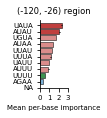

   motif  frequency     score   conf_lo   conf_hi         family  error_lo
8   UAUA       9933  2.339057  2.366097  2.312018  TA/TA-rich_d0  0.027039
4   AUAU       9686  2.096222  2.124084  2.068360  TA/TA-rich_d0  0.027862
10  UGUA       7351  1.743602  1.779272  1.707932  TA/TA-rich_d1  0.035670
3   AUAA       8536  1.413480  1.443205  1.383755  TA/TA-rich_d1  0.029725
11  UUAU       8206  1.300614  1.329130  1.272097  TA/TA-rich_d1  0.028517
12  UUUA       8644  1.156183  1.179774  1.132591  TA/TA-rich_d1  0.023591
9   UAUU       8261  1.004897  1.027737  0.982057  TA/TA-rich_d1  0.022840
5   AUUU       8587  0.912488  0.934318  0.890659  TA/TA-rich_d1  0.021829
14  UUUU       7509  0.582224  0.594940  0.569508      T-rich_d0  0.012716
2   AGAA       5584  0.334801  0.354104  0.315498      A-rich_d1  0.019303
2.366096795099676


In [12]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][4]['hamming'], sigmots, 
                      (-120,-26), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3), xtickint = 1, verbose = True
                     )


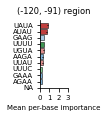

   motif  frequency     score   conf_lo   conf_hi         family  error_lo
8   UAUA       2779  0.825126  0.870156  0.780095  TA/TA-rich_d0  0.045030
4   AUAU       3104  0.720014  0.761331  0.678697  TA/TA-rich_d0  0.041317
7   GAAG       1922  0.423527  0.444730  0.402324      A-rich_d2  0.021203
14  UUUU       3315  0.400644  0.414480  0.386809      T-rich_d0  0.013835
10  UGUA       1877  0.392677  0.444434  0.340920  TA/TA-rich_d1  0.051757
1   AAGA       2907  0.282776  0.299219  0.266333      A-rich_d1  0.016443
11  UUAU       2918  0.279232  0.310164  0.248301  TA/TA-rich_d1  0.030932
13  UUUC       2565  0.259020  0.273714  0.244326      T-rich_d1  0.014694
6   GAAA       2845  0.258687  0.274730  0.242644      A-rich_d1  0.016043
2   AGAA       2803  0.240155  0.255139  0.225171      A-rich_d1  0.014984
0.8701560587266657


In [13]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][4]['hamming'], sigmots, 
                      (-120,-91), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3), xtickint = 1, verbose = True
                     )


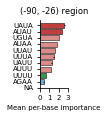

   motif  frequency     score   conf_lo   conf_hi         family  error_lo
8   UAUA       9253  2.619334  2.648959  2.589709  TA/TA-rich_d0  0.029625
4   AUAU       8899  2.391896  2.423221  2.360572  TA/TA-rich_d0  0.031325
10  UGUA       6446  2.053145  2.092683  2.013608  TA/TA-rich_d1  0.039538
3   AUAA       7467  1.826376  1.860400  1.792352  TA/TA-rich_d1  0.034024
11  UUAU       7218  1.601274  1.635264  1.567284  TA/TA-rich_d1  0.033990
12  UUUA       7620  1.459822  1.487505  1.432140  TA/TA-rich_d1  0.027683
9   UAUU       7198  1.269168  1.296608  1.241727  TA/TA-rich_d1  0.027441
5   AUUU       7361  1.168027  1.195396  1.140657  TA/TA-rich_d1  0.027369
14  UUUU       6200  0.668698  0.686121  0.651274      T-rich_d0  0.017424
2   AGAA       3738  0.403904  0.435317  0.372490      A-rich_d1  0.031413
2.6489587675013295


In [14]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][4]['hamming'], sigmots, 
                      (-90,-26), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3), xtickint = 1, verbose = True
                     )


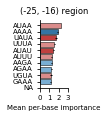

   motif  frequency     score   conf_lo   conf_hi         family  error_lo
3   AUAA       2721  2.266180  2.318287  2.214074  TA/TA-rich_d1  0.052106
0   AAAA       2037  1.908093  1.957387  1.858798      A-rich_d0  0.049295
8   UAUA       1917  1.721698  1.798865  1.644530  TA/TA-rich_d0  0.077167
12  UUUA       1732  1.541373  1.601195  1.481551  TA/TA-rich_d1  0.059822
4   AUAU       1790  1.432770  1.504765  1.360774  TA/TA-rich_d0  0.071995
5   AUUU       1563  1.290950  1.344153  1.237747  TA/TA-rich_d1  0.053203
1   AAGA        981  1.258067  1.326777  1.189357      A-rich_d1  0.068710
2   AGAA        991  1.217515  1.287039  1.147992      A-rich_d1  0.069524
10  UGUA        799  1.197730  1.300326  1.095134  TA/TA-rich_d1  0.102596
6   GAAA       1048  1.161888  1.224431  1.099346      A-rich_d1  0.062543
2.3182868565150887


In [15]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][4]['hamming'], sigmots, 
                      (-25,-16), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3), xtickint = 1, verbose = True
                     )


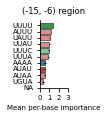

   motif  frequency     score   conf_lo   conf_hi         family  error_lo
14  UUUU       2441  1.411785  1.442005  1.381565      T-rich_d0  0.030220
5   AUUU       2343  1.189478  1.226394  1.152563  TA/TA-rich_d1  0.036915
9   UAUU       1966  1.038020  1.073124  1.002916  TA/TA-rich_d1  0.035104
11  UUAU       1744  1.009994  1.047562  0.972426  TA/TA-rich_d1  0.037568
13  UUUC       1530  0.949645  0.990967  0.908323      T-rich_d1  0.041322
12  UUUA       1732  0.905138  0.944994  0.865281  TA/TA-rich_d1  0.039856
0   AAAA        774  0.556440  0.635826  0.477053      A-rich_d0  0.079387
4   AUAU       1369  0.522083  0.582045  0.462121  TA/TA-rich_d0  0.059962
3   AUAA        901  0.504060  0.570853  0.437266  TA/TA-rich_d1  0.066793
10  UGUA        570  0.315367  0.384338  0.246397  TA/TA-rich_d1  0.068971
1.4420045200984284


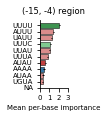

   motif  frequency     score   conf_lo   conf_hi         family  error_lo
14  UUUU       3271  2.074671  2.112865  2.036476      T-rich_d0  0.038195
5   AUUU       2924  1.437140  1.475565  1.398715  TA/TA-rich_d1  0.038425
9   UAUU       2388  1.260876  1.298319  1.223434  TA/TA-rich_d1  0.037443
13  UUUC       1796  1.106252  1.149704  1.062800      T-rich_d1  0.043452
11  UUAU       2041  1.053321  1.088694  1.017947  TA/TA-rich_d1  0.035373
12  UUUA       1922  0.837457  0.877041  0.797872  TA/TA-rich_d1  0.039584
4   AUAU       1624  0.595569  0.650230  0.540908  TA/TA-rich_d0  0.054661
0   AAAA        846  0.424455  0.502535  0.346374      A-rich_d0  0.078080
3   AUAA       1007  0.329776  0.399164  0.260388  TA/TA-rich_d1  0.069388
10  UGUA        699  0.276805  0.343599  0.210012  TA/TA-rich_d1  0.066794
2.112865234274998


In [16]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][4]['hamming'], sigmots, 
                      (-15,-6), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3), xtickint = 1, verbose = True
                     )

motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][4]['hamming'], sigmots, 
                      (-15,-4), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3), xtickint = 1, verbose = True
                     )


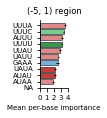

   motif  frequency     score   conf_lo   conf_hi         family  error_lo
12  UUUA       1575  3.588379  3.703215  3.473542  TA/TA-rich_d1  0.114836
13  UUUC       1398  3.406086  3.503937  3.308234      T-rich_d1  0.097851
5   AUUU       1691  3.167840  3.254980  3.080700  TA/TA-rich_d1  0.087140
14  UUUU       1936  3.119848  3.180122  3.059574      T-rich_d0  0.060274
11  UUAU       1476  2.876809  2.969045  2.784572  TA/TA-rich_d1  0.092237
9   UAUU       1548  2.641006  2.716501  2.565510  TA/TA-rich_d1  0.075495
6   GAAA        389  2.543890  2.743867  2.343913      A-rich_d1  0.199977
8   UAUA        897  2.117549  2.244191  1.990908  TA/TA-rich_d0  0.126641
4   AUAU        912  2.107501  2.235461  1.979540  TA/TA-rich_d0  0.127960
3   AUAA        669  1.911727  2.057872  1.765583  TA/TA-rich_d1  0.146144
3.7032148008743517


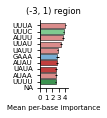

   motif  frequency     score   conf_lo   conf_hi         family  error_lo
12  UUUA       1360  4.116841  4.224010  4.009672  TA/TA-rich_d1  0.107169
13  UUUC       1097  3.813129  3.921039  3.705220      T-rich_d1  0.107910
5   AUUU       1056  3.725927  3.846364  3.605490  TA/TA-rich_d1  0.120437
11  UUAU       1177  3.388810  3.490445  3.287175  TA/TA-rich_d1  0.101635
9   UAUU       1046  2.876861  2.977038  2.776684  TA/TA-rich_d1  0.100177
6   GAAA        363  2.827705  3.008775  2.646635      A-rich_d1  0.181070
4   AUAU        605  2.695171  2.859540  2.530801  TA/TA-rich_d0  0.164369
8   UAUA        785  2.565108  2.682200  2.448017  TA/TA-rich_d0  0.117092
3   AUAA        564  2.553381  2.672708  2.434054  TA/TA-rich_d1  0.119327
14  UUUU       1004  2.537462  2.642802  2.432123      T-rich_d0  0.105339
4.224009909523773


In [17]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][4]['hamming'], sigmots, 
                      (-5,1), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,4), xtickint = 1, verbose = True
                     )

motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][4]['hamming'], sigmots, 
                      (-3,1), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,4.5), xtickint = 1, verbose = True
                     )


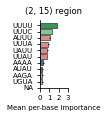

   motif  frequency     score   conf_lo   conf_hi         family  error_lo
14  UUUU       3373  1.818610  1.845503  1.791717      T-rich_d0  0.026893
13  UUUC       2503  1.310856  1.345659  1.276054      T-rich_d1  0.034803
5   AUUU       2604  1.030339  1.065710  0.994967  TA/TA-rich_d1  0.035371
12  UUUA       2329  0.901877  0.934180  0.869574  TA/TA-rich_d1  0.032303
9   UAUU       2353  0.786366  0.816027  0.756705  TA/TA-rich_d1  0.029661
11  UUAU       2237  0.776329  0.811857  0.740801  TA/TA-rich_d1  0.035528
0   AAAA       1256  0.369683  0.400797  0.338569      A-rich_d0  0.031114
4   AUAU       1614  0.243919  0.288209  0.199629  TA/TA-rich_d0  0.044290
1   AAGA        747  0.237519  0.288358  0.186680      A-rich_d1  0.050839
10  UGUA        908  0.234444  0.281637  0.187251  TA/TA-rich_d1  0.047193
1.8455029965058498


In [18]:
motifs.region_barplot(OUTDIR, mot_dis_dir, scer_definitions['distance'][4]['hamming'], sigmots, 
                      (2,15), "mean", 95, method = "hamming", palette = family_cmap, 
                      minfreq = int(0.01 * gold_sites), stringent_frequency = True, topn = 10, 
                      xlim = (0,3), xtickint = 1, verbose = True
                     )
